# Bedarfshalt

## Fragestellung
- Wieviel Zeit spart ein Zug, wenn er an einem Bedarfshalt durchfährt (im Vergleich zum Halt ohne Fahrgastwechsel)?
- Veranschaulichen Sie beide Bewegungsabläufe (mit und ohne Halt) in einem gemeinsamen $s(t)$-Diagramm und markieren Sie, an welcher Stelle die Zeiteinsparung abgelesen werden kann.
- Schätzen Sie die Kraftstoffeinsparung ein, die durch die Durchfahrt zustande kommt.

## Lösung
Hier sollen zwei Bewegungsabläufe verglichen werden, die für die Betrachtung hier ein wenig vereinfacht dargestellt werden. Zunächst der Ablauf mit Halt:
1. Der Zug nähert sich dem Haltepunkt mit der Anfangsgeschwindigkeit $v_\mathrm{anfang}$ (Streckengeschwindigkeit).
2. Im Abstand $s_\mathrm{brems}$ vor dem Haltepunkt (Bremsweg) startet der Fahrer den Bremsvorgang mit der konstanten Verzögerung $a_\mathrm{brems} < 0$. Der Abstand $s_\mathrm{brems}$ ist so gewählt, dass der Zug exakt am Haltepunkt (der hier tatsächlich als ein Punkt aufgefasst wird) zum Stehen kommt.
3. Der Zug steht für eine kurze Wartezeit $t_\mathrm{warte}$ am Haltepunkt still.
4. Der Zug beschleunigt mit der konstanten Beschleunigung $a_\mathrm{anfahr}$ bis zum Erreichen der Endgeschwindigkeit $v_\mathrm{ende}$.

Bei Durchfahrt entsteht folgender Bewegungsablauf
1. Der Zug nähert sich dem Haltepunkt mit der Anfangsgeschwindigkeit $v_\mathrm{anfang}$ (Streckengeschwindigkeit).
2. Im Abstand $s_\mathrm{brems}$ startet der Fahrer den Bremsvorgang mit der konstanten Verzögerung $a_\mathrm{brems} < 0$. Der Zug wird jedoch nur auf ein reduzierte Geschwindigkeit $v_\mathrm{durchfahrt}$ abgebremst.
3. Der Zug fährt mit der Geschwindigkeit $v_\mathrm{durchfahrt}$ bis zum Haltepunkt.
4. Beim Passieren des Haltepunkts startet der Fahrer den Beschleunigungsvorgang mit $a_\mathrm{anfahr}$ bis zum Erreichen von $v_\mathrm{ende}$.

### Gegebene Größen
Für die Berechnung werden folgende Größen vorgegeben:
- Anfangs- und Endgeschwindigkeit
- Durchfahrtgeschwindigkeit
- Beschleunigung beim Bremsen und Anfahren
- Wartezeit

Für die Berechnung der Kraftstoffeinsparung werden folgende Angaben benötigt:
- Masse des Triebwagens
- Heizwert und Dichte von Diesel
- Wirkungsgrad des Motors

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

v_anfang = 80 / 3.6 # Geschwindigkeit in m/s
v_ende = 80 / 3.6 # Geschwindigkeit in m/s
v_durchfahrt = 35 / 3.6 # Geschwindigkeit in m/s

a_brems = -0.5 # Verzögerung in m/s^2
a_anfahr = 0.5 # Beschnleunigung in m/s^2

t_warte = 15 # Wartezeit in Sekunden

m_wagen = 73e3 # Masse des Triebwagens in kg

H_diesel = 42.6e6 # Heizwert in J / kg
rho_diesel = 0.83 # Dichte von Diesel in kg/l

eta = 0.42 # Wirkunsgrad des Motors

### Vorgang 1: Halt am Haltepunkt

Größen, die sich speziell auf diesen Vorgang beziehen, werden durch einen zusätzlichen Index 1 gekennzeichnet.

#### Bremsvorgang

Der Bremsvorgang ist eine gleichmäßig beschleunigte Bewegung mit der $a_\mathrm{brems}$. Der Beginn des Bremsvorgangs erfolge bei $s = 0$. Es gelten die bekannten kinematischen Formeln

$$s(t) = \frac{1}{2} a_\mathrm{brems}t^2 + v_\mathrm{anfang} t$$

und

$$v(t) = a_\mathrm{brems}t + v_\mathrm{anfang} \, .$$

Daraus folgt für die Dauer des Bremsvorgangs (mit $v(t_\mathrm{brems}) = 0$)

$$t_\mathrm{brems,1} = - \frac{v_\mathrm{anfang}}{a_\mathrm{brems}} \, .$$

Da $a_\mathrm{brems}$ negativ ist, ergibt sich eine positive Zeit. Für den Bremsweg $s_\mathrm{brems} = s(t_\mathrm{brems})$ ergibt sich

$$s_\mathrm{brems,1} = -\frac{v_\mathrm{anfang}^2}{2 a_\mathrm{brems}} \, .$$

Die beiden letzten Berechnungen werden in das Skript übernommen:

In [2]:
t_brems1 = -v_anfang / a_brems
s_brems1 = - v_anfang**2 / (2 * a_brems)

Für die Darstellung im Diagramm wird eine Zeitvariable definiert, die das Intervall $t=0$ bis $t_\mathrm{brems,1}$ abdeckt. Die Wegvariable für diesen Bewegungsabschnitt wird entsprechend der obigen $s(t)$-Formel definiert.

In [3]:
tvar_brems1 = np.linspace(0, t_brems1, 50)
svar_brems1 = 0.5 * a_brems * tvar_brems1**2 + v_anfang * tvar_brems1

#### Wartezeit

Die Wartezeit ist eine vorgegebene Größe.

Zur Darstellung im Diagramm werden trotzdem zwei Arrays für Zeit und Weg definiert. Da die $s(t)$-Kurve hier eine horizontale Gerade darstellt, genügen 2 Datenpunkte.

In [4]:
tvar_warte = np.array([t_brems1, t_brems1 + t_warte])
svar_warte = np.array([s_brems1, s_brems1])

#### Beschleunigungsvorgang

Der Anfahrvorgang stellt wieder eine gleichmäßig beschleunigte Bewegung dar. Da hier zunächst dieser Vorgang einzeln betrachtet wird (die Ermittlung des Gesamtwegs erfolgt später), muss kein Anfangsweg berücksichtigt werden. Die Anfangsgeschwindigkeit ist Null. Somit gilt

$$s(t) = \frac{1}{2} a_\mathrm{anfahr} t^2$$

und

$$v(t) = a_\mathrm{anfahr} t \, .$$

Nach der Zeit $t_\mathrm{anfahr}$ ist die Geschwindigkeit $v_\mathrm{ende}$ erreicht:

$$t_\mathrm{anfahr,1} = \frac{v_\mathrm{ende}}{a_\mathrm{anfahr}} \, .$$

Dabei wird der Weg

$$s_\mathrm{anfahr,1} = \frac{v_\mathrm{ende}^2}{2 a_\mathrm{anfahr}}$$

zurückgelegt.

In [5]:
t_anfahr1 = v_ende / a_anfahr
s_anfahr1 = v_ende**2 / (2 * a_anfahr)

#### Gesamtdauer & Gesamtweg

Bei Vorgang 1 (Fahrt mit Halt am Haltepunkt) wird der Weg

$$s_\mathrm{gesamt,1} = s_\mathrm{brems,1} + s_\mathrm{anfahr,1}$$

zwischen Beginn des Bremsvorgangs und Erreichen der Endgeschwindigkeit nach dem Halt zurückgelegt. Dafür wird die Zeit

$$t_\mathrm{gesamt,1} = t_\mathrm{brems,1} + t_\mathrm{warte} + t_\mathrm{anfahr,1}$$

benötigt.

In [6]:
s_gesamt1 = s_brems1 + s_anfahr1
t_gesamt1 = t_brems1 + t_warte + t_anfahr1

Zur Darstellung des letzten Bewegungsabschnitts im Diagramm wird eine Zeitvariable für das Intervall $t_\mathrm{brems,1} + t_\mathrm{warte}$ bis $t_\mathrm{gesamt,1}$ angelegt. Anschließend erfolgt die Berechnung die zugehörigen Wegvariable entsprechend der obigen Formel. Um die $s(t)$-Kurve im Diagramm auch über das Erreichen der Endgeschwindigkeit hinaus zeichnen zu können, werden anschließend Zeit- und Wegvariable für eine gleichförmige Bewegung definiert.

In [7]:
tvar_anfahr1 = np.linspace(t_brems1 + t_warte, t_gesamt1, 50)
svar_anfahr1 = 0.5 * a_anfahr * (tvar_anfahr1 - t_brems1 - t_warte)**2 + s_brems1

tvar_weiter1 = np.linspace(t_gesamt1, 2*t_gesamt1, 50)
svar_weiter1 = v_ende * (tvar_weiter1 - t_gesamt1) + s_gesamt1

### Vorgang 2: Durchfahrt am Haltepunkt

Größen, die sich speziell auf diesen Vorgang beziehen, werden durch einen zusätzlichen Index 2 gekennzeichnet.

#### Bremsvorgang

Der Bremsvorgang ist eine gleichmäßig beschleunigte Bewegung mit der Verzögerung $a_\mathrm{brems}$ von der Geschwindigkeit $v_\mathrm{anfang}$ auf $v_\mathrm{durchfahrt}$, die nach der Zeit $t_\mathrm{brems}$ erreicht wird. Aus den allgemeinen kinematischen Formeln (s.o.) folgt

$$t_\mathrm{brems,2} = \frac{v_\mathrm{durchfahrt} - v_\mathrm{anfang}}{a_\mathrm{brems}}$$

und

$$s_\mathrm{brems,2} = \frac{v_\mathrm{durchfahrt}^2 - v_\mathrm{anfang}^2}{2 a_\mathrm{brems}} \, .$$

In [8]:
t_brems2 = (v_durchfahrt - v_anfang) / a_brems
s_brems2 = (v_durchfahrt**2 - v_anfang**2) / (2 * a_brems)

Für die Darstellung im Diagramm werden wie auch im Vorgang 1 Zeit- und Wegvariable definiert bzw. berechnet.

In [9]:
tvar_brems2 = np.linspace(0, t_brems2, 50)
svar_brems2 = 0.5 * a_brems * tvar_brems2**2 + v_anfang * tvar_brems2

#### Durchfahrt

Anschließend fährt der Zug gleichförmig bis zum Haltepunkt, der sich an der Position $s = s_\mathrm{brems,1}$ befindet. Für den Weg

$$s_\mathrm{durchfahrt} = s_\mathrm{brems,1} - s_\mathrm{brems,2}$$

wird die Zeit

$$t_\mathrm{durchfahrt} = \frac{s_\mathrm{durchfahrt}}{v_\mathrm{durchfahrt}}$$

benötigt.

In [10]:
s_durchfahrt = s_brems1 - s_brems2
t_durchfahrt = s_durchfahrt / v_durchfahrt

Für die Darstellung im Diagramm werden wieder die entsprechenden Variablen definiert bzw. berechnet.

In [11]:
tvar_durchfahrt = np.linspace(t_brems2, t_brems2 + t_durchfahrt, 50)
svar_durchfahrt = v_durchfahrt * (tvar_durchfahrt - t_brems2) + s_brems2

#### Beschleunigungsvorgang

Auch hier liegt eine gleichmäßig beschleunigte Bewegung mit $a_\mathrm{anfahr}$ vor. Anfangsgeschwindigkeit ist $v_\mathrm{durchfahrt}$. Anfangsweg bleibt unberücksichtigt (Ermittlung des Gesamtwegs erfolgt später). Die Beschleunigungsphase endet, wenn $v_\mathrm{ende}$ erreicht ist. Aus den allgemeinen kinematischen Formeln folgt

$$t_\mathrm{anfahr,2} = \frac{v_\mathrm{ende} - v_\mathrm{durchfahrt}}{a_\mathrm{anfahr}}$$

und

$$s_\mathrm{anfahr,2} = \frac{v_\mathrm{ende}^2 - v_\mathrm{durchfahrt}^2}{2 a_\mathrm{anfahr}} \, .$$

In [12]:
t_anfahr2 = (v_ende - v_durchfahrt) / a_anfahr
s_anfahr2 = (v_ende**2 - v_durchfahrt**2) / (2 * a_anfahr)

Für die Darsteung im Diagramm wird wieder eine Zeitvariable definiert, die den Beschleunigungsvorgang abdeckt. Anhand dieser wird anschließend die zugehörige Wegvariable für die gleichmäßig beschleunigte Bewegung berechnet.

In [13]:
tvar_anfahr2 = np.linspace(t_brems2 + t_durchfahrt, t_brems2 + t_durchfahrt + t_anfahr2)
svar_anfahr2 = 0.5 * a_anfahr * (tvar_anfahr2 - t_brems2 - t_durchfahrt)**2 + v_durchfahrt * (tvar_anfahr2 - t_brems2 - t_durchfahrt) + s_brems1

#### Weiterfahrt

Zur Bestimmung der Zeitdifferenz muss noch die Weiterfahrt des Zugs bis zur Absolvierung des Gesamtwegs $s_\mathrm{gesamt,1}$ des ersten Vorgangs betrachtet werden. Die Zeitdifferenz bei Erreichen dieses Orts ist die gesuchte Zeiteinsparung. Es wird also der Weg

$$s_\mathrm{weiter} = s_\mathrm{gesamt,1} - s_\mathrm{brems,2} - s_\mathrm{durch,2} - s_\mathrm{anfahr,2} = s_\mathrm{gesamt,1} - s_\mathrm{brems,1} - s_\mathrm{anfahr,2}$$

betrachtet, der mit der Geschwindigkeit $v_\mathrm{ende}$ zurückgelegt wird. Dafür wird die Zeit

$$t_\mathrm{weiter} = \frac{s_\mathrm{weiter}}{v_\mathrm{ende}}$$

benötigt.

In [14]:
s_weiter = s_gesamt1 - s_brems1 -s_anfahr2
t_weiter = s_weiter / v_ende

#### Gesamtdauer und Gesamtstrecke

Gesamtstrecke ist identisch zum Bewegungsvorgang 1; andernfalls ließe sich nicht die Zeiteinsparung ermitteln. Die Gesamtzeit des zweiten Vorgangs setzt sich fogendermaßen zusammen:

$$t_\mathrm{gesamt,2} = t_\mathrm{brems,2} + t_\mathrm{durchfahrt} + t_\mathrm{anfahr,2} + t_\mathrm{weiter} \, .$$

In [15]:
t_gesamt2 = t_brems2 + t_durchfahrt + t_anfahr2 + t_weiter

Zur Darstellung des letzten Bewegungsabschnitts im Diagramm werden auch hier eine Zeitvariable und eine Wegvariable definiert bzw. berechnet. Die Obergrenzen gehen über die berechnete Gesamtzeit hinaus, damit die Kurve im Diagramm entsprechend weit gezeichnet wird

In [16]:
tvar_weiter2 = np.linspace(t_brems2 + t_durchfahrt + t_anfahr2, 2 * t_gesamt2, 50)
svar_weiter2 = v_ende * (tvar_weiter2 - t_brems2 - t_durchfahrt - t_anfahr2) + s_brems1 + s_anfahr2

### Zeiteinsparung

Die gesuchte Zeiteinsparung ergibt sich als Differenz der Gesamtzeiten beider Vorgänge:

$$\Delta t = t_\mathrm{gesamt,1} - t_\mathrm{gesamt,2} \, .$$

In [17]:
Delta_t = t_gesamt1 - t_gesamt2
print(f'Die Zeiteinsparung beträgt {Delta_t:.1f} s.')
print(f'Davon sind {t_warte} s reine Wartezeit am Haltepunkt.')

Die Zeiteinsparung beträgt 39.9 s.
Davon sind 15 s reine Wartezeit am Haltepunkt.


### Diagramm

Zunächst wird das Diagramm erzeugt. Anschließend werden die einzelnen Kurven für beide Vorgänge in ihren jeweiligen Phasen eingezeichnet.

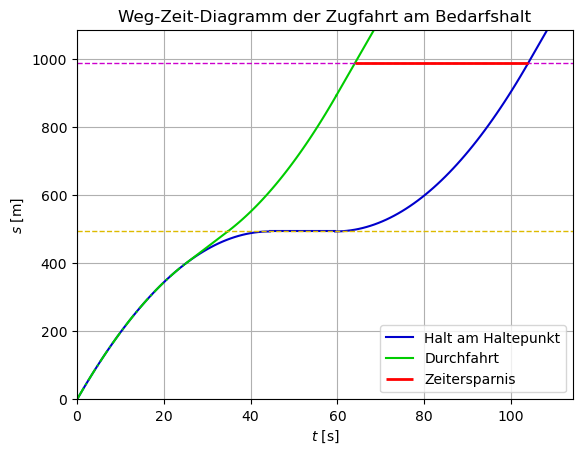

In [18]:
diagramm = plt.figure()
ax = diagramm.add_subplot(1,1,1)

ax.set_title('Weg-Zeit-Diagramm der Zugfahrt am Bedarfshalt')
ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$s$ [m]')
ax.set_xlim(0, 1.1*t_gesamt1)
ax.set_ylim(0, 1.1*s_gesamt1)
ax.grid()

ax.plot(tvar_brems1, svar_brems1, color='#0000cc', label='Halt am Haltepunkt')
ax.plot(tvar_warte, svar_warte, color='#0000cc')
ax.plot(tvar_anfahr1, svar_anfahr1, color='#0000cc')
ax.plot(tvar_weiter1, svar_weiter1, color='#0000cc')

ax.plot(tvar_brems2, svar_brems2, color='#00cc00', linestyle='-.')
ax.plot(tvar_durchfahrt, svar_durchfahrt, color='#00cc00', label='Durchfahrt')
ax.plot(tvar_anfahr2, svar_anfahr2, color='#00cc00')
ax.plot(tvar_weiter2, svar_weiter2, color='#00cc00')

ax.axhline(y = s_brems1, color ='#ddbb00', linestyle='--', linewidth=1) # Position des Haltepunkts
ax.axhline(y = s_gesamt1, color ='#cc00cc', linestyle='--', linewidth=1) # Position bei Erreichen der Endgeschwindigkeit nach Halt
ax.hlines(y = s_gesamt1, xmin = t_gesamt2, xmax = t_gesamt1, color='#ff0000', linewidth=2, label='Zeitersparnis')
ax.legend()

#plt.savefig('bedarfshalt_diagramm.svg')

Die untere horizontale Strichlinie markiert die Position des Haltepunkts. Die obere horizontale Hilfslinie markiert die Position, an der nach Halt am Haltepunkt die Endgeschwindigkeit erreicht ist. Der horizontale Abstand zwischen den beiden Kurven an dieser Position ergibt die Zeitersparnis aufgrund der Durchfahrt.

### Kraftstoffeinsparung

Zur Ermittlung der Kraftstoffeinsparung wird von der zur Beschleunigung erforderlichen mechanischen Arbeit ausgegangen. Nach dem Halt muss zum Erreichen der Endgeschwindigkeit $v_\mathrm{ende}$ die Arbeit

$$W_1 = \frac{1}{2} m_\mathrm{wagen} v_\mathrm{ende}^2$$

verrichtet werden. Bei Durchfahrt beginnt die Beschleunigung mit der Geschwindigkeit $v_\mathrm{durchfahrt}$ und die erforderliche Arbeit reduziert sich auf

$$W_2 = \frac{1}{2} m_\mathrm{wagen} (v_\mathrm{ende}^2 - v_\mathrm{durchfahrt}^2) \, .$$

Dies führt zu einer Differenz der mechanischen Arbeit von

$$\Delta W = W_1 - W_2 = \frac{1}{2} m_\mathrm{wagen} v_\mathrm{durchfahrt}^2 \, .$$

Die Beschleunigungarbeit wird vom Motor verrichtet, der hierfür die durch Verbrennung freiwerdende Energie des Diesels nutzt. Letztere wird durch den Heizwert $H$ gegeben:

$$E = v_\mathrm{diesel} \rho_\mathrm{diesel} H_\mathrm{diesel} \, ,$$

wobei $\rho_\mathrm{diesel}$ die Dichte von Diesel bezeichnet, da der Heizwert auf die Masse bezogen angegeben wird. Unter Berücksichtigung des Wirkungsgrads $\eta$ des Motors ergibt sich:

$$W_\mathrm{beschleunigung} = \eta V_\mathrm{diesel} \rho_\mathrm{diesel} H_\mathrm{diesel} \, .$$

Die oben bestimmte Differenz der mechanischen Arbeit entspricht somit einer Verringerung des benötigten Diesels:

$$\Delta V = \frac{\Delta W}{\eta \rho_\mathrm{diesel} H_\mathrm{diesel}} = \frac{ m_\mathrm{wagen} v_\mathrm{durchfahrt}^2}{2 \eta \rho_\mathrm{diesel} H_\mathrm{diesel}} \, .$$

In [21]:
Delta_V = m_wagen * v_durchfahrt**2 / (2 * eta * rho_diesel * H_diesel)
print(f'Die Kraftstoffeinsparung beträgt {Delta_V:.2f} l Diesel.')

Die Kraftstoffeinsparung beträgt 0.23 l Diesel.
